## Contruction of Blocks in Example 2.1, Matthews & Taylor

### 0. Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Data

Text(0.5, 1.0, 'Scatterplot of sample X')

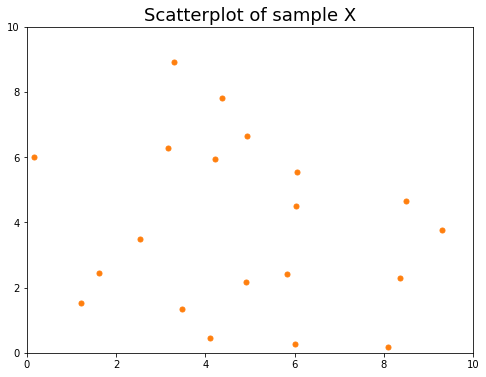

In [3]:
X = np.array([[4.91, 2.16], [6.05, 5.54], [3.48, 1.35], [8.09, 0.18], [2.53, 3.49],
             [1.62, 2.46], [8.37, 2.29], [3.17, 6.27], [6.02, 4.51], [8.50, 4.65],
             [4.21, 5.93], [0.15, 5.99], [9.31, 3.77], [4.10, 0.45], [5.83, 2.42],
             [6.00, 0.27], [3.30, 8.93], [4.38, 7.81], [4.93, 6.64], [1.22, 1.54]])

N = X.shape[0]

plt.figure(figsize=(8,6))
plt.plot(X[:,0], X[:,1], 'o', color = 'C1', label = 'Data', zorder = 1, ms = 5)


plt.xlim(0,10)
plt.ylim(0,10)

plt.title('Scatterplot of sample X', fontsize=18)
# plt.legend(fontsize=18)
# plt.grid()

### 2. Cutting functions

In [4]:
# each function is arbitrary and takes one of the components of the corresponding (x1, x2)
H = np.array([1,1,0,1,1,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1])
H = np.array([0,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0])

# define the permutaions (arbitrary)
K = np.array([10, 5, 15, 3, 7, 12, 18, 2, 4, 6, 8, 11, 13, 16, 19, 1, 9, 14, 17, 20])
K = np.array([10, 5, 15, 3, 8, 13, 18, 2, 4, 7, 9, 12, 14, 17, 19, 1, 6, 11, 16, 20])


### 3. Partition: Base Case
#### Example of how a partition is done

In [5]:
i = 0
# index of K to work with
Kindex = K[i]-1   # substract 1 to work in python index
# select cutting function
Hfun = H[Kindex]
# select the axis to sort the elements
Xele = X[:, Hfun]
# select the Kindex th statistic
Xorder = np.sort(Xele)
print(Xorder)
xstat = Xorder[Kindex]


[0.15 1.22 1.62 2.53 3.17 3.3  3.48 4.1  4.21 4.38 4.91 4.93 5.83 6.
 6.02 6.05 8.09 8.37 8.5  9.31]


Text(0.5, 1.0, 'Scatterplot of sample X')

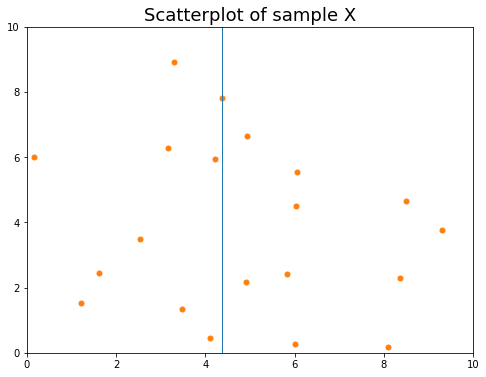

In [6]:
# plot
fig = plt.figure(figsize=(8,6))

plt.plot(xstat*np.ones(2), np.array([0,10]), label = 'Partition', lw = 1)
plt.plot(X[:,0], X[:,1], 'o', label = 'Data', zorder = 1, ms = 5)

plt.xlim(0,10)
plt.ylim(0,10)

plt.title('Scatterplot of sample X', fontsize=18)
# plt.legend(fontsize=18)
# plt.grid()


### Let's define a class to work with the blocks

In [7]:
class block():
    def __init__(self, vertices = None, elements = None, stats = None, parent = None, leftChild = None, rightChild = None):
        self.vertices = vertices   # array with 2 bidimensional elemntes, corresponding to the vertices of the block
                                   # vertices must be ordered starting from the left bottom vertix and finishin with the
                                   # right top vertix
                                   # the array must have two rows and two columns (bidimensional case)
        self.elements = elements   # array with the points that belong to the block. Each row contains an element and each
                                   # column is a dimension (in this case, bidimensional)
        self.stats = np.sort(stats) # array with index of blocks
        self.parent = parent       # parent of the block
        self.leftChild = leftChild
        self.rightChild = rightChild
    
    def plot(self, color = 'C0', lw = 1, size = 12):
        plt.plot(self.vertices[:,0], np.ones(2)*self.vertices[0,1], color = color, lw = lw)
        plt.plot(np.ones(2)*self.vertices[1,0], self.vertices[:,1], color = color, lw = lw)
        plt.plot(self.vertices[:,0], np.ones(2)*self.vertices[1,1], color = color, lw = lw)
        plt.plot(np.ones(2)*self.vertices[0,0], self.vertices[:,1], color = color, lw = lw)
        xplot = (self.vertices[0,0]+self.vertices[1,0])/2
        yplot = (self.vertices[0,1]+self.vertices[1,1])/2
        if self.stats.size == 1:
            plt.text(xplot, yplot, str(self.stats[0]), fontsize = size)

        
    def split(self, axis, korder):
        """
        axis indicates wheter it is along the X axis (vertical, 0) or the Y axis (horizontal, 1)
        korder is the order statistic to make the partition -> in python would be korder - 1
        """
        # select the dimension to sort
        Xele = self.elements[:,axis]
        # select the kth order statistic
        Xorder = np.sort(Xele)
        minStat = min(self.stats)
        korder = korder - minStat
        xstat = Xorder[korder]
        # divide the stats
        statsL = self.stats[:korder+1]
        statsR = self.stats[korder+1:]
        # create the elements and vertices of each block
        Relements = np.empty((0, 2))
        Lelements = np.empty((0, 2))
        
        # add elements to vertices and elements for each case
        if axis == 0:
            Lvertices = np.array([self.vertices[0,:], [xstat, self.vertices[1,1]]])
            Rvertices = np.array([[xstat, self.vertices[0,1]], self.vertices[1,:]])
            # now we move on the elements of the parent block and select wich ones go to the left and right child
            for l in range(self.elements.shape[0]):
                if Xele[l] <= xstat:
                    Lelements = np.append(Lelements, [self.elements[l, :]], axis = 0)   # add the new element as a row
                else:   # Xele > xstat
                    Relements = np.append(Relements, [self.elements[l, :]], axis = 0)   # add the new element as a row
        elif axis == 1:
            Lvertices = np.array([self.vertices[0,:], [self.vertices[1,0], xstat]])
            Rvertices = np.array([[self.vertices[0,0], xstat],self.vertices[1,:]])
            # now we move on the elements of the parent block and select wich ones go to the left and right child
            for l in range(self.elements.shape[0]):
                if Xele[l] <= xstat:
                    Lelements = np.append(Lelements, [self.elements[l, :]], axis = 0)   # add the new element as a row
                else:   # Xele > xstat
                    Relements = np.append(Relements, [self.elements[l, :]], axis = 0)   # add the new element as a row
                
        # create the childs of the block
        Rchild = block(vertices = Rvertices, elements = Relements, stats = statsR, parent = self)  
        # right side or up side (the greaters elements)
        Lchild = block(vertices = Lvertices, elements = Lelements, stats = statsL, parent = self)   
        # left side or down side (the smaller elements)
        
        # asociate the childs to the parten
        self.rightChild = Rchild
        self.leftChild = Lchild
        # return the place where the partition was made
        return xstat
        
        

[4 5 6 7]
[8]
[[1.  1. ]
 [2.  3. ]
 [3.  2. ]
 [2.5 1.5]]
[[4.  3.5]]
[[0. 0.]
 [5. 3.]]
[[0. 3.]
 [5. 4.]]
2


Text(2, 2, '4')

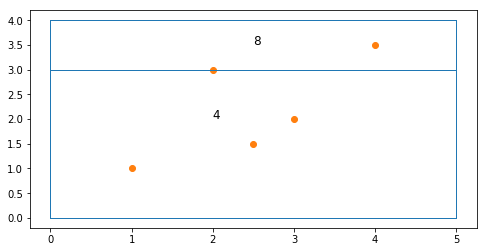

In [8]:
# some test to the class
Vertix = np.array([[0,0], [5,4]])
Elements = np.array([[1,1], [2,3], [4,3.5], [3,2],[2.5,1.5]])
stats = range(1+3, Elements.shape[0]+1+3)
Bloque = block(vertices = Vertix, elements = Elements, stats = stats)

fig = plt.figure(figsize=(8,4))
# Bloque.plot(color = 'g')
plt.plot(Elements[:,0], Elements[:,1], 'o', color = 'C1')

Bloque.split(axis = 1, korder = 7)
print(Bloque.leftChild.stats)
print(Bloque.rightChild.stats)
print(Bloque.leftChild.elements)
print(Bloque.rightChild.elements)
print(Bloque.leftChild.vertices)
print(Bloque.rightChild.vertices)
print(Bloque.rightChild.elements.size)

Bloque.leftChild.plot()
Bloque.rightChild.plot()
plt.text(2, 2, str(4), fontsize = 12)


### 4. Partition: general case
#### We proceed to use the block class to apply the partition in a iterative loop

In [9]:
# create list with blocks
First_Block = block(vertices = np.array([[0,0],[10,10]]), elements = X, stats = range(1,N+2))

Blocks_List = [First_Block]

for i in range(N):
    # search the last block that has the K[i] stat
    for j in range(len(Blocks_List)):
        if K[i] in Blocks_List[j].stats and Blocks_List[j].leftChild == None:
            #print(H[K[i]-1])
            Blocks_List[j].split(axis = H[K[i]-1], korder = K[i])
            Blocks_List.extend([Blocks_List[j].leftChild, Blocks_List[j].rightChild])
            #print(Blocks_List[j].leftChild.stats)
            #print(Blocks_List[j].rightChild.stats)
            #print(Blocks_List[j].leftChild.elements)
            #print(Blocks_List[j].rightChild.elements)
            break

### Now we plot the finals blocks

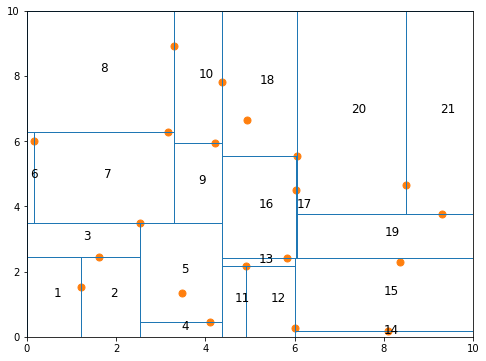

In [10]:
# plot
fig = plt.figure(figsize=(8,6))
# Bloque.plot(color = 'g')
plt.plot(X[:,0], X[:,1], 'o', color = 'C1', ms = 7)

plt.xlim(0,10)
plt.ylim(0,10)

for j in range(len(Blocks_List)):
    if Blocks_List[j].leftChild == None:
        Blocks_List[j].plot()
        # print(Blocks_List[j].elements)
        
# plt.plot([0,10], [0,0], color = 'white', lw = 1)
# plt.plot([0,10], [10,10], color = 'white', lw = 1)
# plt.plot([0,0], [0,10], color = 'white', lw = 1)
# plt.plot([10,10], [0,10], color = 'white', lw = 1)

$\alpha^2$